In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_pickle('in_mig')
in_df = pd.DataFrame(df[-1], columns= ['migration', 'ifips', 'jfips'])

In [4]:
#show me first 5 rows
in_df.head()

,migration,ifips,jfips
0,72.0,1021.0,1001.0
1,52.0,1047.0,1001.0
2,466.0,1051.0,1001.0
3,46.0,1073.0,1001.0
4,19.0,1081.0,1001.0


In [12]:
# get the first 1000 rows
in_df = in_df[:1000]

# remove all the ones that have 0 migration
in_df = in_df[in_df['migration'] != 0]

In [5]:
!pip install networkx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.8 MB/s eta 0:00:0000:0100:01


In [13]:
import networkx as nx

# Create an empty directed graph
G = nx.DiGraph()

# Iterate through the rows in the DataFrame and add edges to the graph
for index, row in in_df.iterrows():
    source = int(row['ifips'])
    target = int(row['jfips'])
    weight = row['migration']
    G.add_edge(source, target, weight=weight)

# Print the graph's nodes and edges
print("Nodes:", G.nodes())
print("Edges:", G.edges(data=True))


Nodes: [1021, 1001, 1047, 1051, 1073, 1081, 1085, 1097, 1101, 1117, 8041, 1015, 1003, 1025, 1053, 1055, 1069, 1077, 1089, 1095, 1099, 1103, 1121, 1125, 1129, 6037, 6073, 12031, 12033, 12057, 12091, 12103, 12113, 13067, 13089, 13121, 13135, 17031, 22033, 22051, 22103, 28047, 28059, 32003, 47037, 47157, 48029, 48201, 48439, 1011, 1005, 1045, 1067, 1109, 1113, 13215, 13239, 1007, 1105, 1043, 1009, 1115, 1127, 1087, 1035, 1013, 1039, 1041, 1019, 1027, 1029, 1049, 1111, 13045, 1017, 1123, 13145, 13285, 13055, 13115, 13233, 1023, 1119, 28075, 1091, 1131, 1037, 13143, 1031, 1061, 12005, 15003, 36071, 37051, 47125, 48027, 1059, 1033, 1079, 28141, 12131, 1083, 1133, 2090, 13051, 21047, 36045, 48099, 48141, 53053, 1071, 13083, 13295, 47065, 1075, 1057, 1093, 28057, 12059, 1063, 1065, 12063, 12073, 12095, 12105, 13087, 13095, 13099, 47115, 4013, 4019, 5119, 6059, 6065, 6071, 6075, 11001, 12001, 12009, 12011, 12071, 12083, 12099, 12115, 12117, 12127, 13021, 13057, 13059, 13063, 13097, 13113, 13245

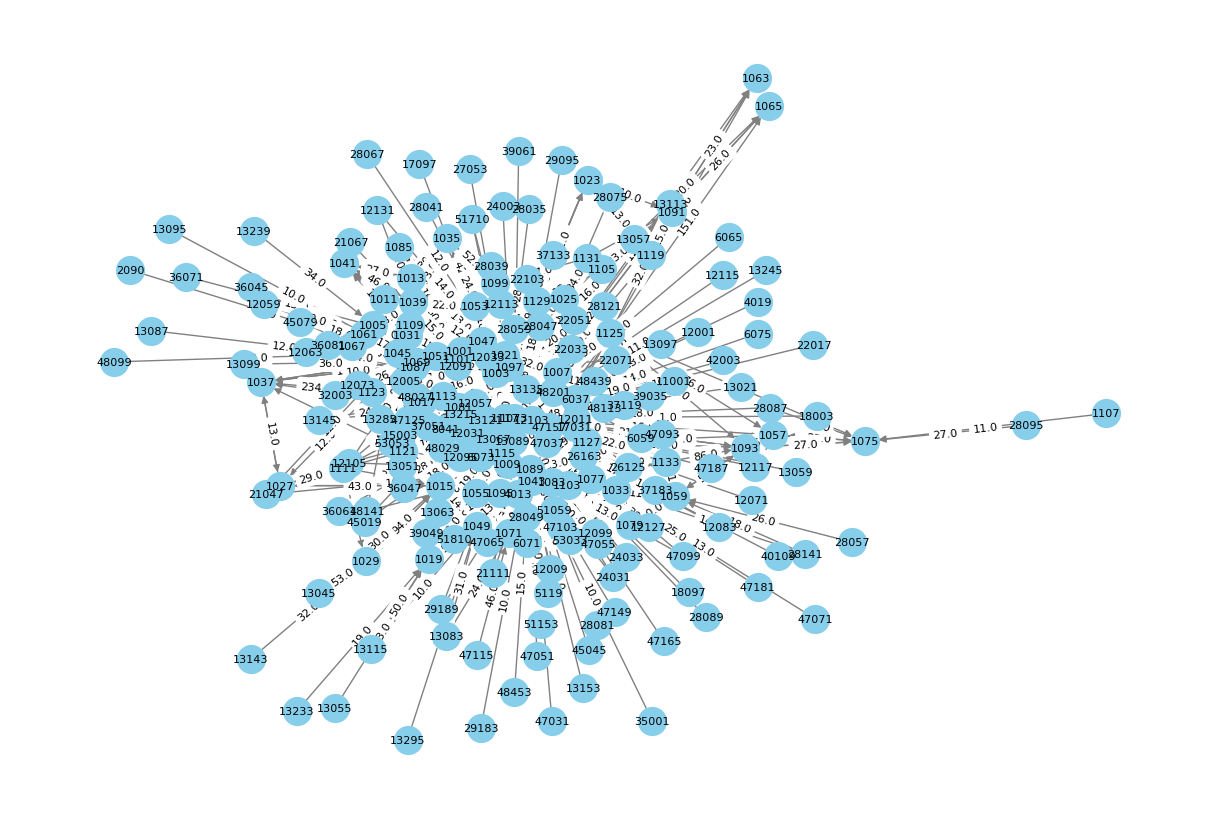

In [16]:
import matplotlib.pyplot as plt

# Assuming G is your directed graph

# Set the figure size
plt.figure(figsize=(12, 8))

# Draw the graph
pos = nx.spring_layout(G, seed=42)  # Positions the nodes using the spring layout algorithm
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=400, edge_color='gray', arrows=True, font_size=8)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d['weight']}" for u, v, d in G.edges(data=True)}, font_size=8)

# Display the plot
plt.show()
